In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime as dt
import sklearn

In [5]:
retail_dt=pd.read_csv("heart_v2.csv")

retail_dt.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [6]:
retail_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [7]:
retail_dt.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [8]:
retail_dt.isnull().sum().sum()

0

In [9]:
retail_dt['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [10]:
retail_dt=retail_dt.dropna()
retail_dt.shape

(270, 5)

In [11]:
retail_dt.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [12]:
retail_dt.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [13]:
import matplotlib.pyplot as plt  

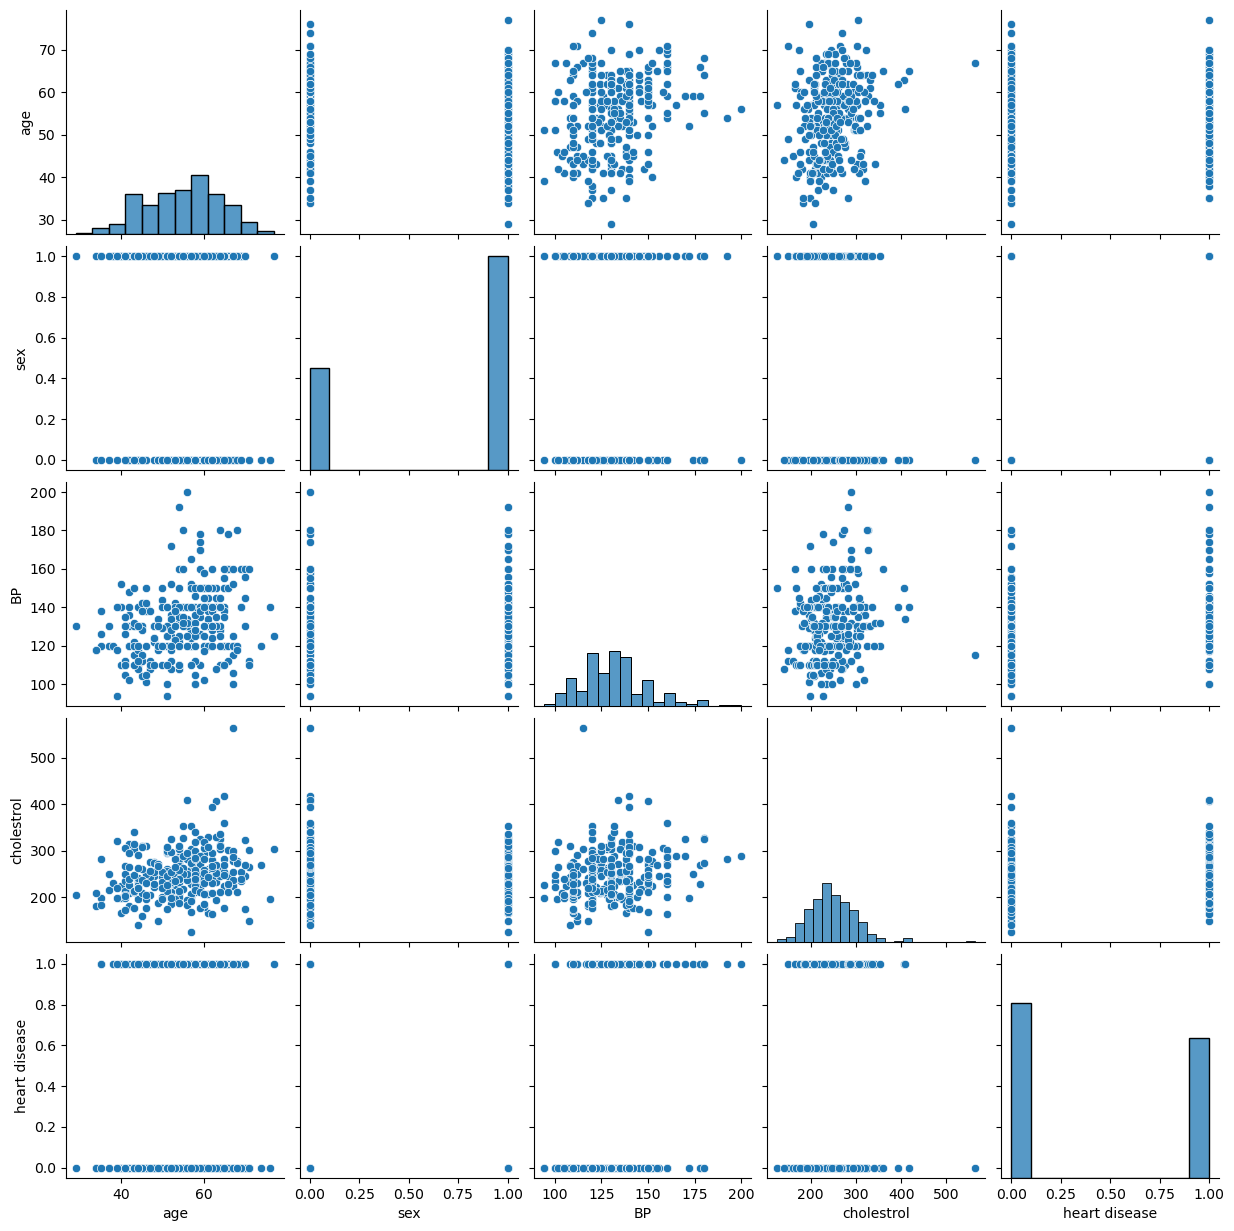

In [14]:
###visualisation
sns.pairplot(retail_dt, vars=['age', 'sex', 'BP', 'cholestrol', 'heart disease'])
plt.show()

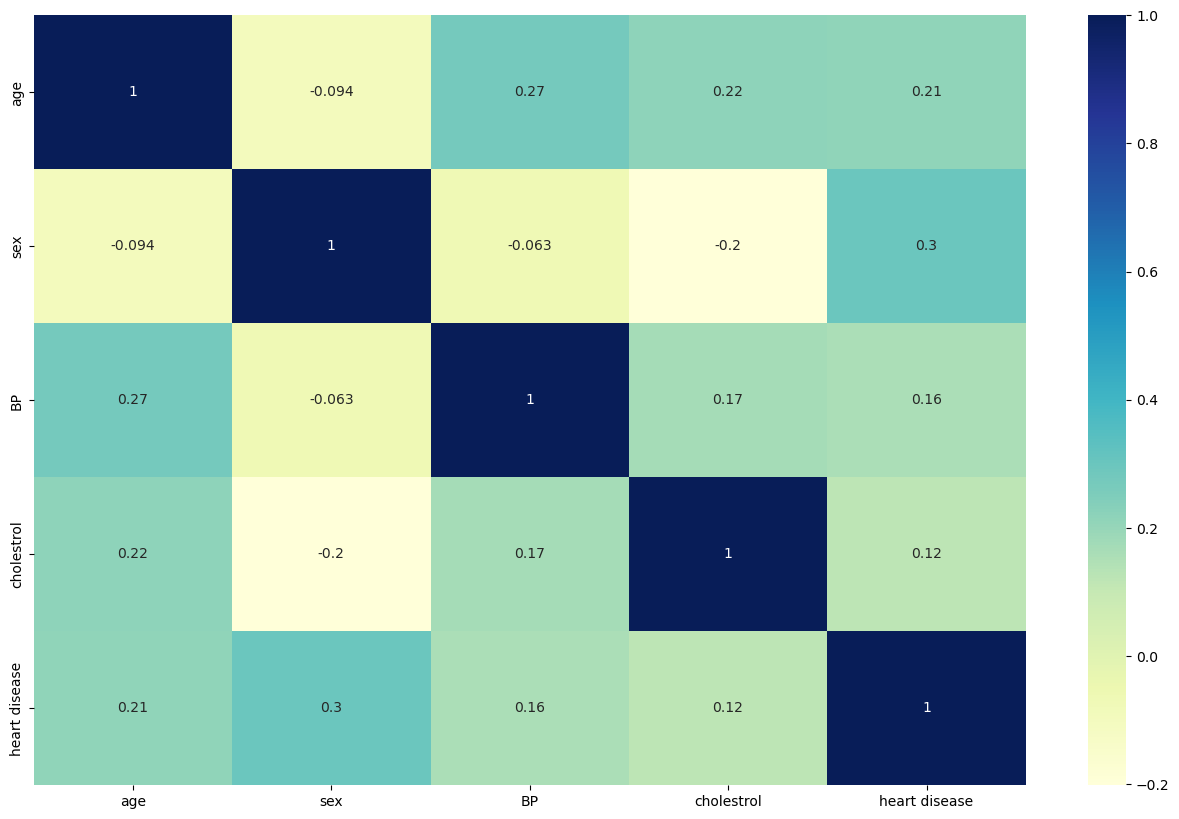

In [15]:
plt.figure(figsize = (16, 10))
sns.heatmap(retail_dt.corr(), annot = True, cmap="YlGnBu")
plt.show()

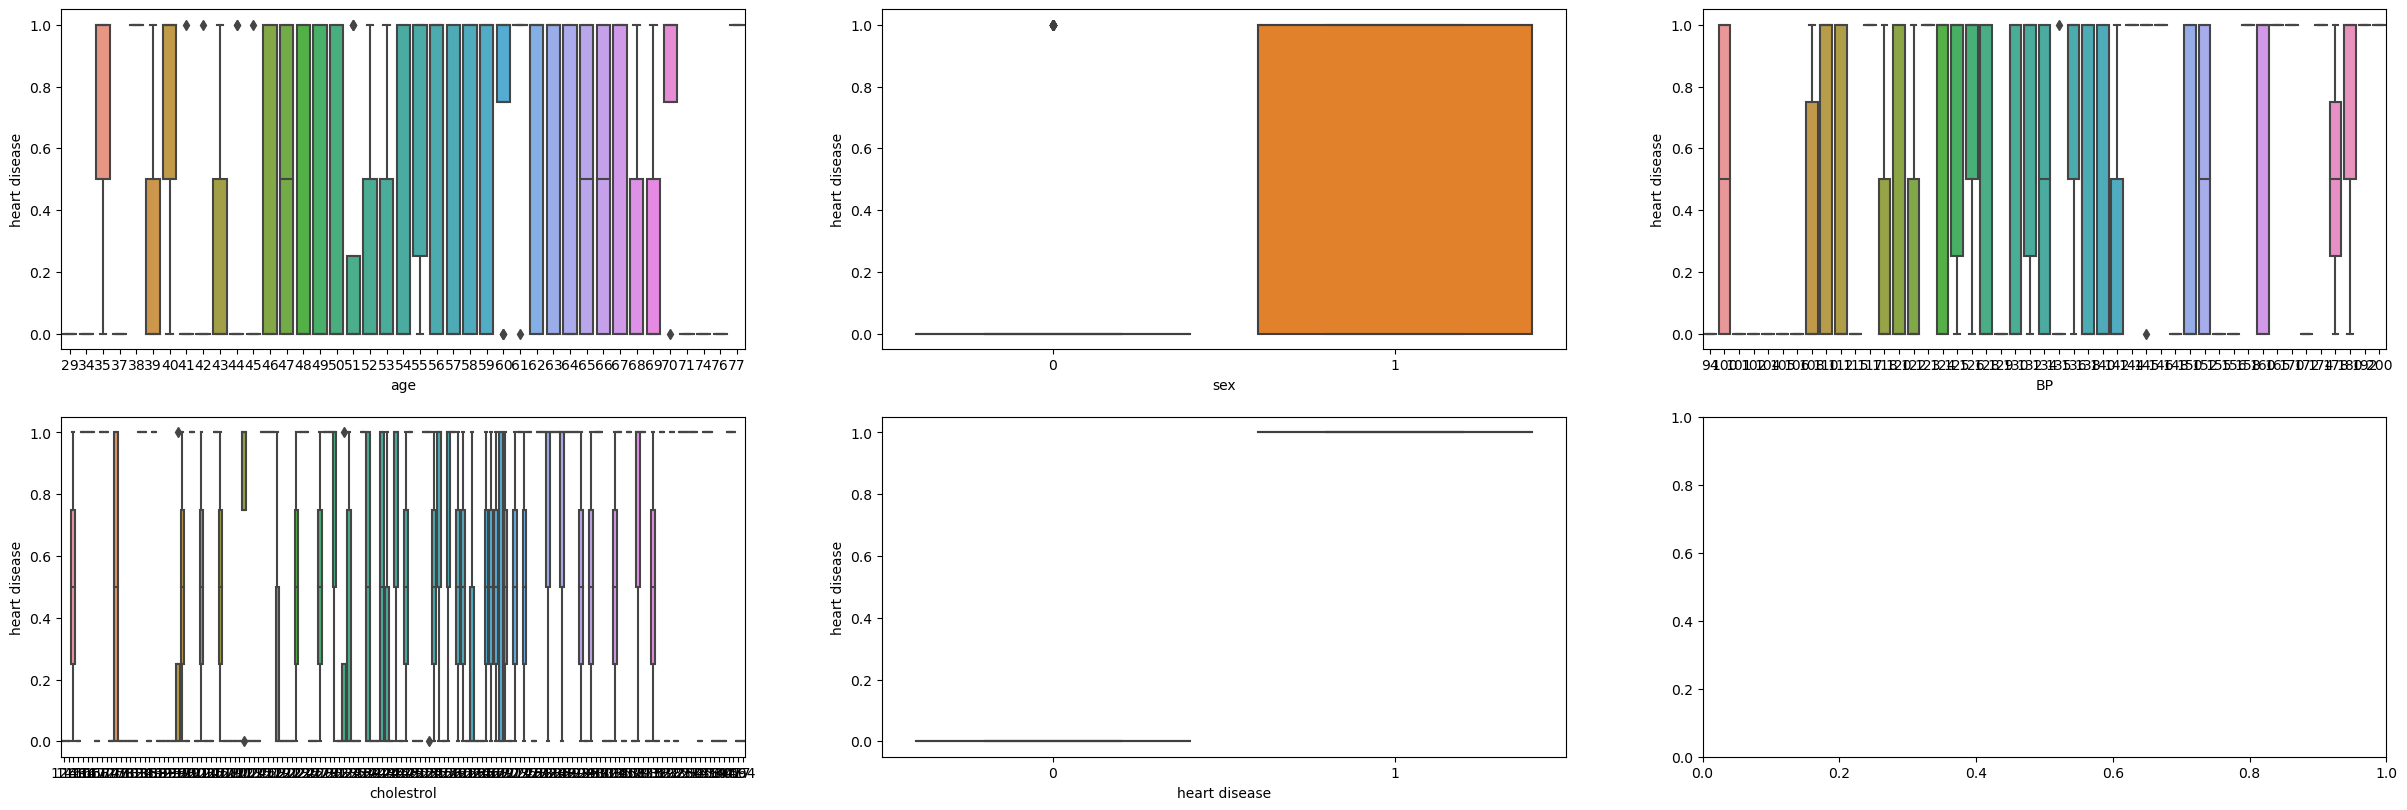

In [16]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'age', y = 'heart disease', data = retail_dt)
plt.subplot(3,3,2)
sns.boxplot(x = 'sex', y = 'heart disease', data =retail_dt)
plt.subplot(3,3,3)
sns.boxplot(x = 'BP', y = 'heart disease', data =retail_dt)
plt.subplot(3,3,4)
sns.boxplot(x = 'cholestrol', y = 'heart disease', data =retail_dt)
plt.subplot(3,3,5)
sns.boxplot(x = 'heart disease', y = 'heart disease', data = retail_dt)
plt.subplot(3,3,6)
plt.show()

In [17]:
import plotly.express as px
fig = px.box(retail_dt["age"], title="plotly")
fig.show()

In [18]:
retail_dt['sex'].value_counts()

1    183
0     87
Name: sex, dtype: int64

In [19]:
import plotly.express as px
fig = px.box(retail_dt["sex"], title="plotly")
fig.show()

In [20]:
import plotly.express as px
fig = px.box(retail_dt["BP"], title="plotly")
fig.show()

In [21]:
import plotly.express as px
fig = px.box(retail_dt["cholestrol"], title="plotly")
fig.show()

In [22]:
import plotly.express as px
fig = px.box(retail_dt["heart disease"], title="plotly")
fig.show()

In [23]:
retail_dt.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

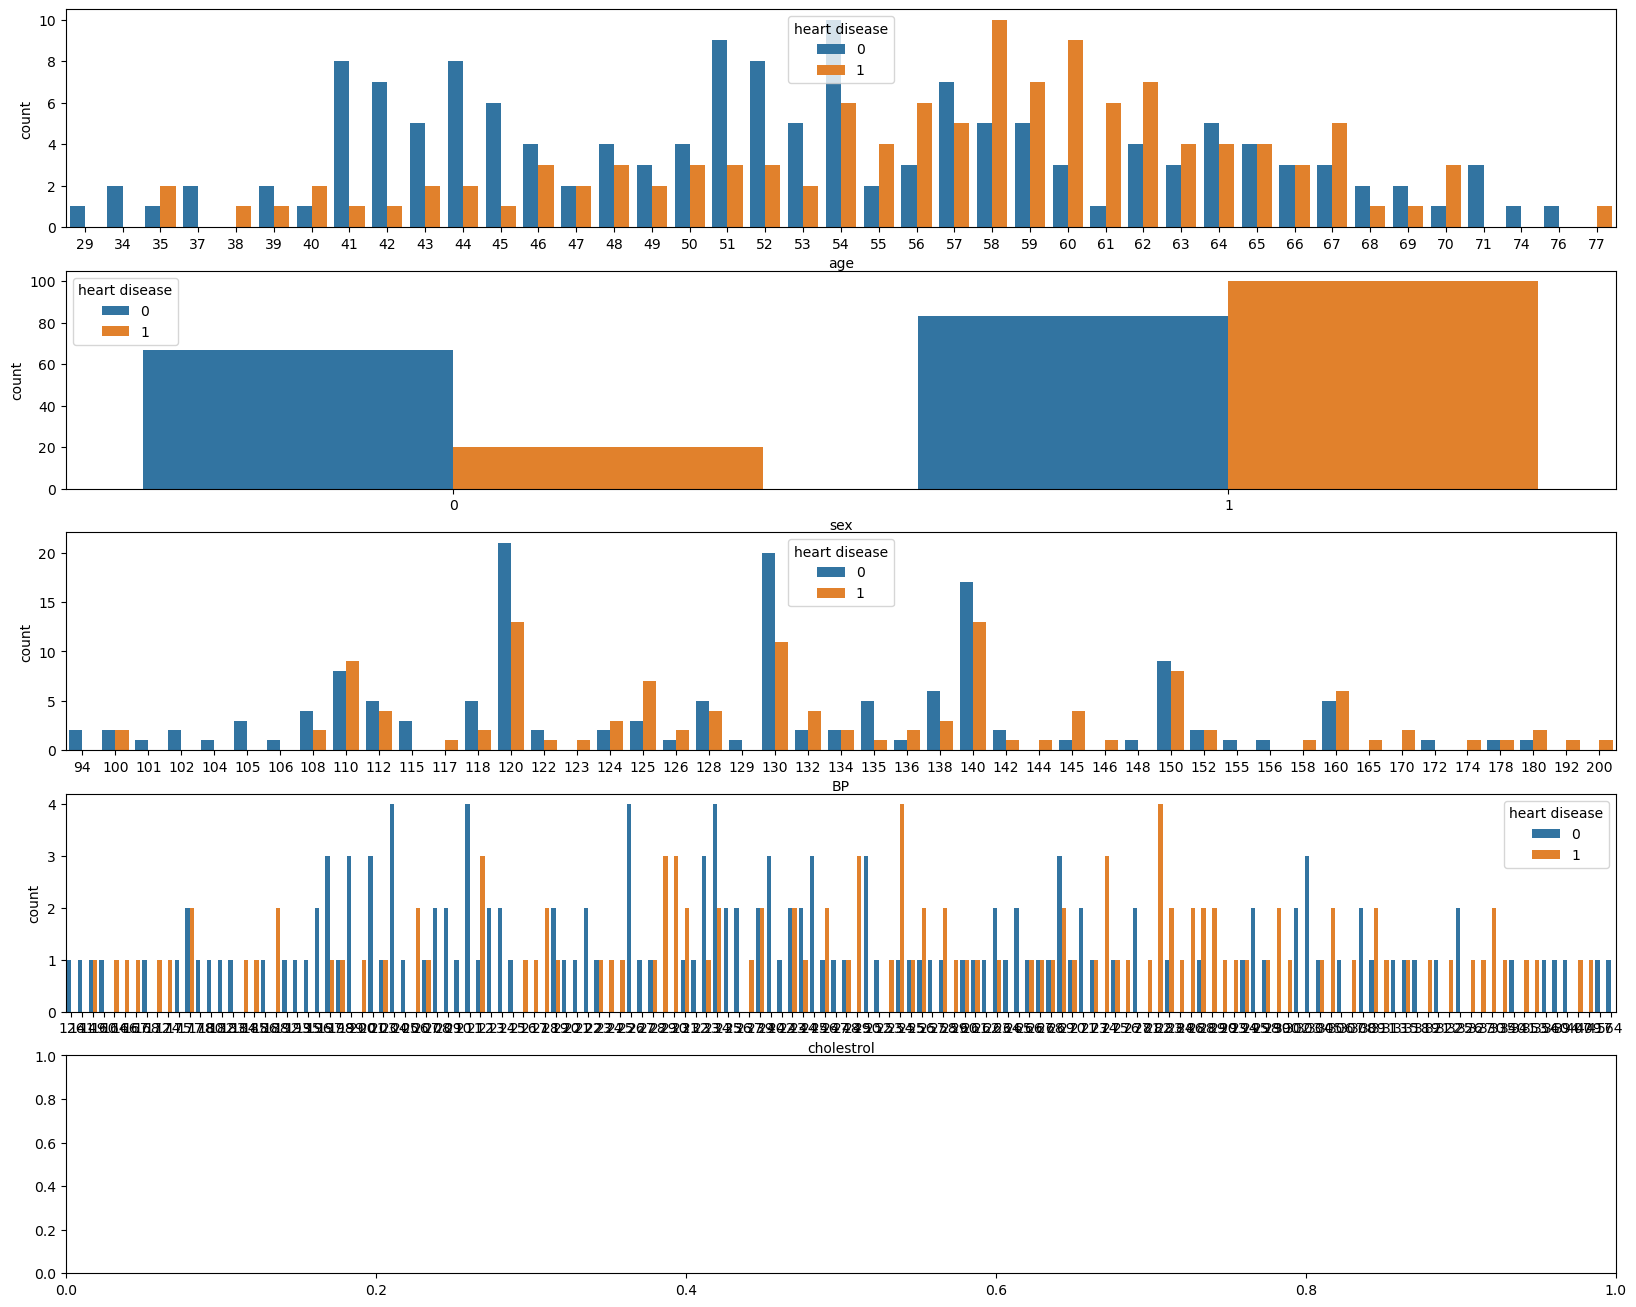

In [24]:
plt.figure(figsize=(20, 30))
plt.subplot(9,1,1)
sns.countplot(x = 'age', hue = 'heart disease', data = retail_dt)
plt.subplot(9,1,2)
sns.countplot(x = 'sex', hue = 'heart disease', data = retail_dt)
plt.subplot(9,1,3)
sns.countplot(x = 'BP', hue = 'heart disease', data = retail_dt)
plt.subplot(9,1,4)
sns.countplot(x = 'cholestrol', hue = 'heart disease', data = retail_dt)
plt.subplot(9,1,5)
plt.show()

In [25]:
###Scaling


In [26]:
# Putting feature variable to X
X = retail_dt.drop('heart disease',axis=1)

# Putting response variable to y
y = retail_dt['heart disease']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)
X_train.shape,y_train.shape

((189, 4), (189,))

In [29]:
X_train.head()

age  sex   BP  cholestrol
84    57    1  110         201
251   44    1  130         219
92    54    1  124         266
201   58    1  125         300
126   62    1  120         267

In [30]:
X_train.shape

(189, 4)

In [31]:

from sklearn.preprocessing import StandardScaler

In [32]:

scaler = StandardScaler()

X_train[['age', 'sex', 'BP', 'cholestrol']] = scaler.fit_transform(X_train[['age', 'sex', 'BP', 'cholestrol']])
X_train.head()



age       sex        BP  cholestrol
84   0.246885  0.665393 -1.218091   -0.964008
251 -1.180400  0.665393 -0.101064   -0.620599
92  -0.082489  0.665393 -0.436172    0.276080
201  0.356676  0.665393 -0.380321    0.924741
126  0.795841  0.665393 -0.659578    0.295158

In [33]:
age=(sum(retail_dt['age'])/len(retail_dt['age'].index))*100
age

5443.333333333333

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(retail_dt.corr(),annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [35]:
#X_test=x_test.drop(['age', 'sex', 'BP', 'cholestrol'], 1)
#X_train = X_train.drop(['age', 'sex', 'BP', 'cholestrol'], 1)

In [36]:
##Logistic regression

In [37]:
import statsmodels.api as sm

In [38]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          heart disease   No. Observations:                  189
Model:                            GLM   Df Residuals:                      184
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -112.87
Date:                Tue, 14 Mar 2023   Deviance:                       225.75
Time:                        11:51:28   Pearson chi2:                     184.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1707
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1950      0.162     -1.203      0.229      -0.513       0.123
age            0.5421      0.181      3.000      0.003       0.188       0.896
sex            0.8073      0.187      4.327      0.000       0.442       1.173
BP             0.3449      0.168      2.058      0.040       0.016       0.673
cholestrol     0.1490      0.168      0.886      0.375      -0.180       0.478
==============================================================================
"""

In [39]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [40]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=1)             
rfe=rfe.fit(X_train, y_train)

In [41]:
rfe.support_

array([False,  True, False, False])

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 2),
 ('sex', True, 1),
 ('BP', False, 3),
 ('cholestrol', False, 4)]

In [43]:
col = X_train.columns[rfe.support_]

In [44]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          heart disease   No. Observations:                  189
Model:                            GLM   Df Residuals:                      187
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.09
Date:                Tue, 14 Mar 2023   Deviance:                       246.19
Time:                        11:51:33   Pearson chi2:                     189.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07593
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1638      0.153     -1.072      0.284      -0.463       0.136
sex            0.5918      0.160      3.691      0.000       0.278       0.906
==============================================================================
"""

In [45]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

84     0.557252
251    0.557252
92     0.557252
201    0.557252
126    0.557252
124    0.557252
78     0.258621
181    0.258621
111    0.557252
229    0.557252
dtype: float64

In [46]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55725191, 0.55725191, 0.55725191, 0.55725191, 0.55725191,
       0.55725191, 0.25862069, 0.25862069, 0.55725191, 0.55725191])

In [47]:
y_train_pred_final = pd.DataFrame({'age':y_train.values, 'age_prob':y_train_pred})
y_train_pred_final['BP'] = y_train.index
y_train_pred_final.head()

age  age_prob   BP
0    0  0.557252   84
1    0  0.557252  251
2    1  0.557252   92
3    1  0.557252  201
4    1  0.557252  126

In [48]:
y_train_pred_final['predicted'] = y_train_pred_final.age_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

age  age_prob   BP  predicted
0    0  0.557252   84          1
1    0  0.557252  251          1
2    1  0.557252   92          1
3    1  0.557252  201          1
4    1  0.557252  126          1

In [49]:
%matplotlib inline

In [50]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier
retail_dt = DecisionTreeClassifier(max_depth=3)
retail_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
retail_dt = DecisionTreeClassifier(max_depth=3)
retail_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
##Decision TREE
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [53]:
from sklearn.tree import plot_tree


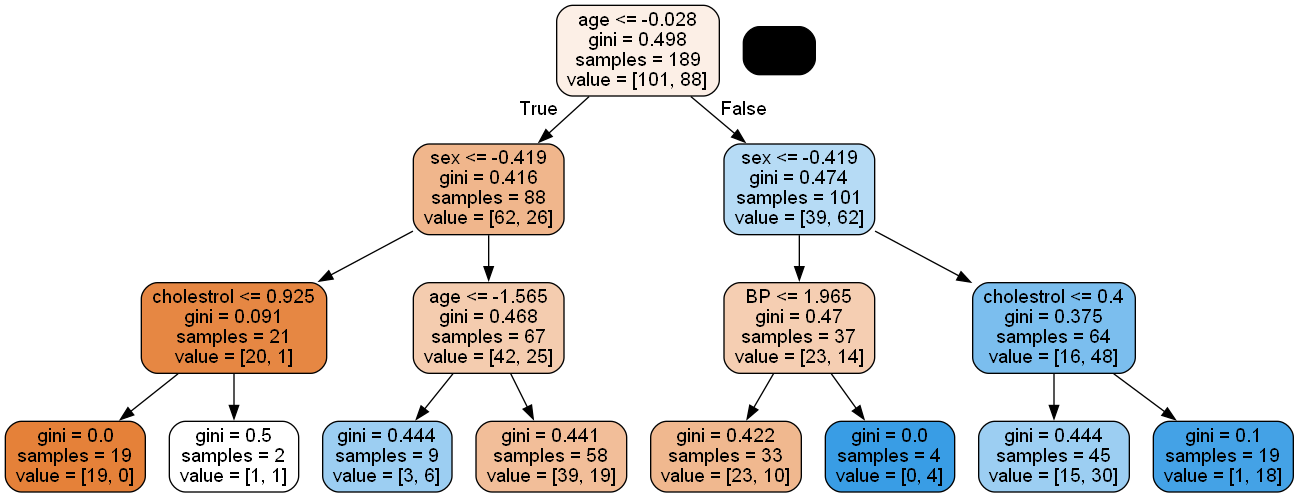

In [54]:
dot_data = StringIO()  

export_graphviz(retail_dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

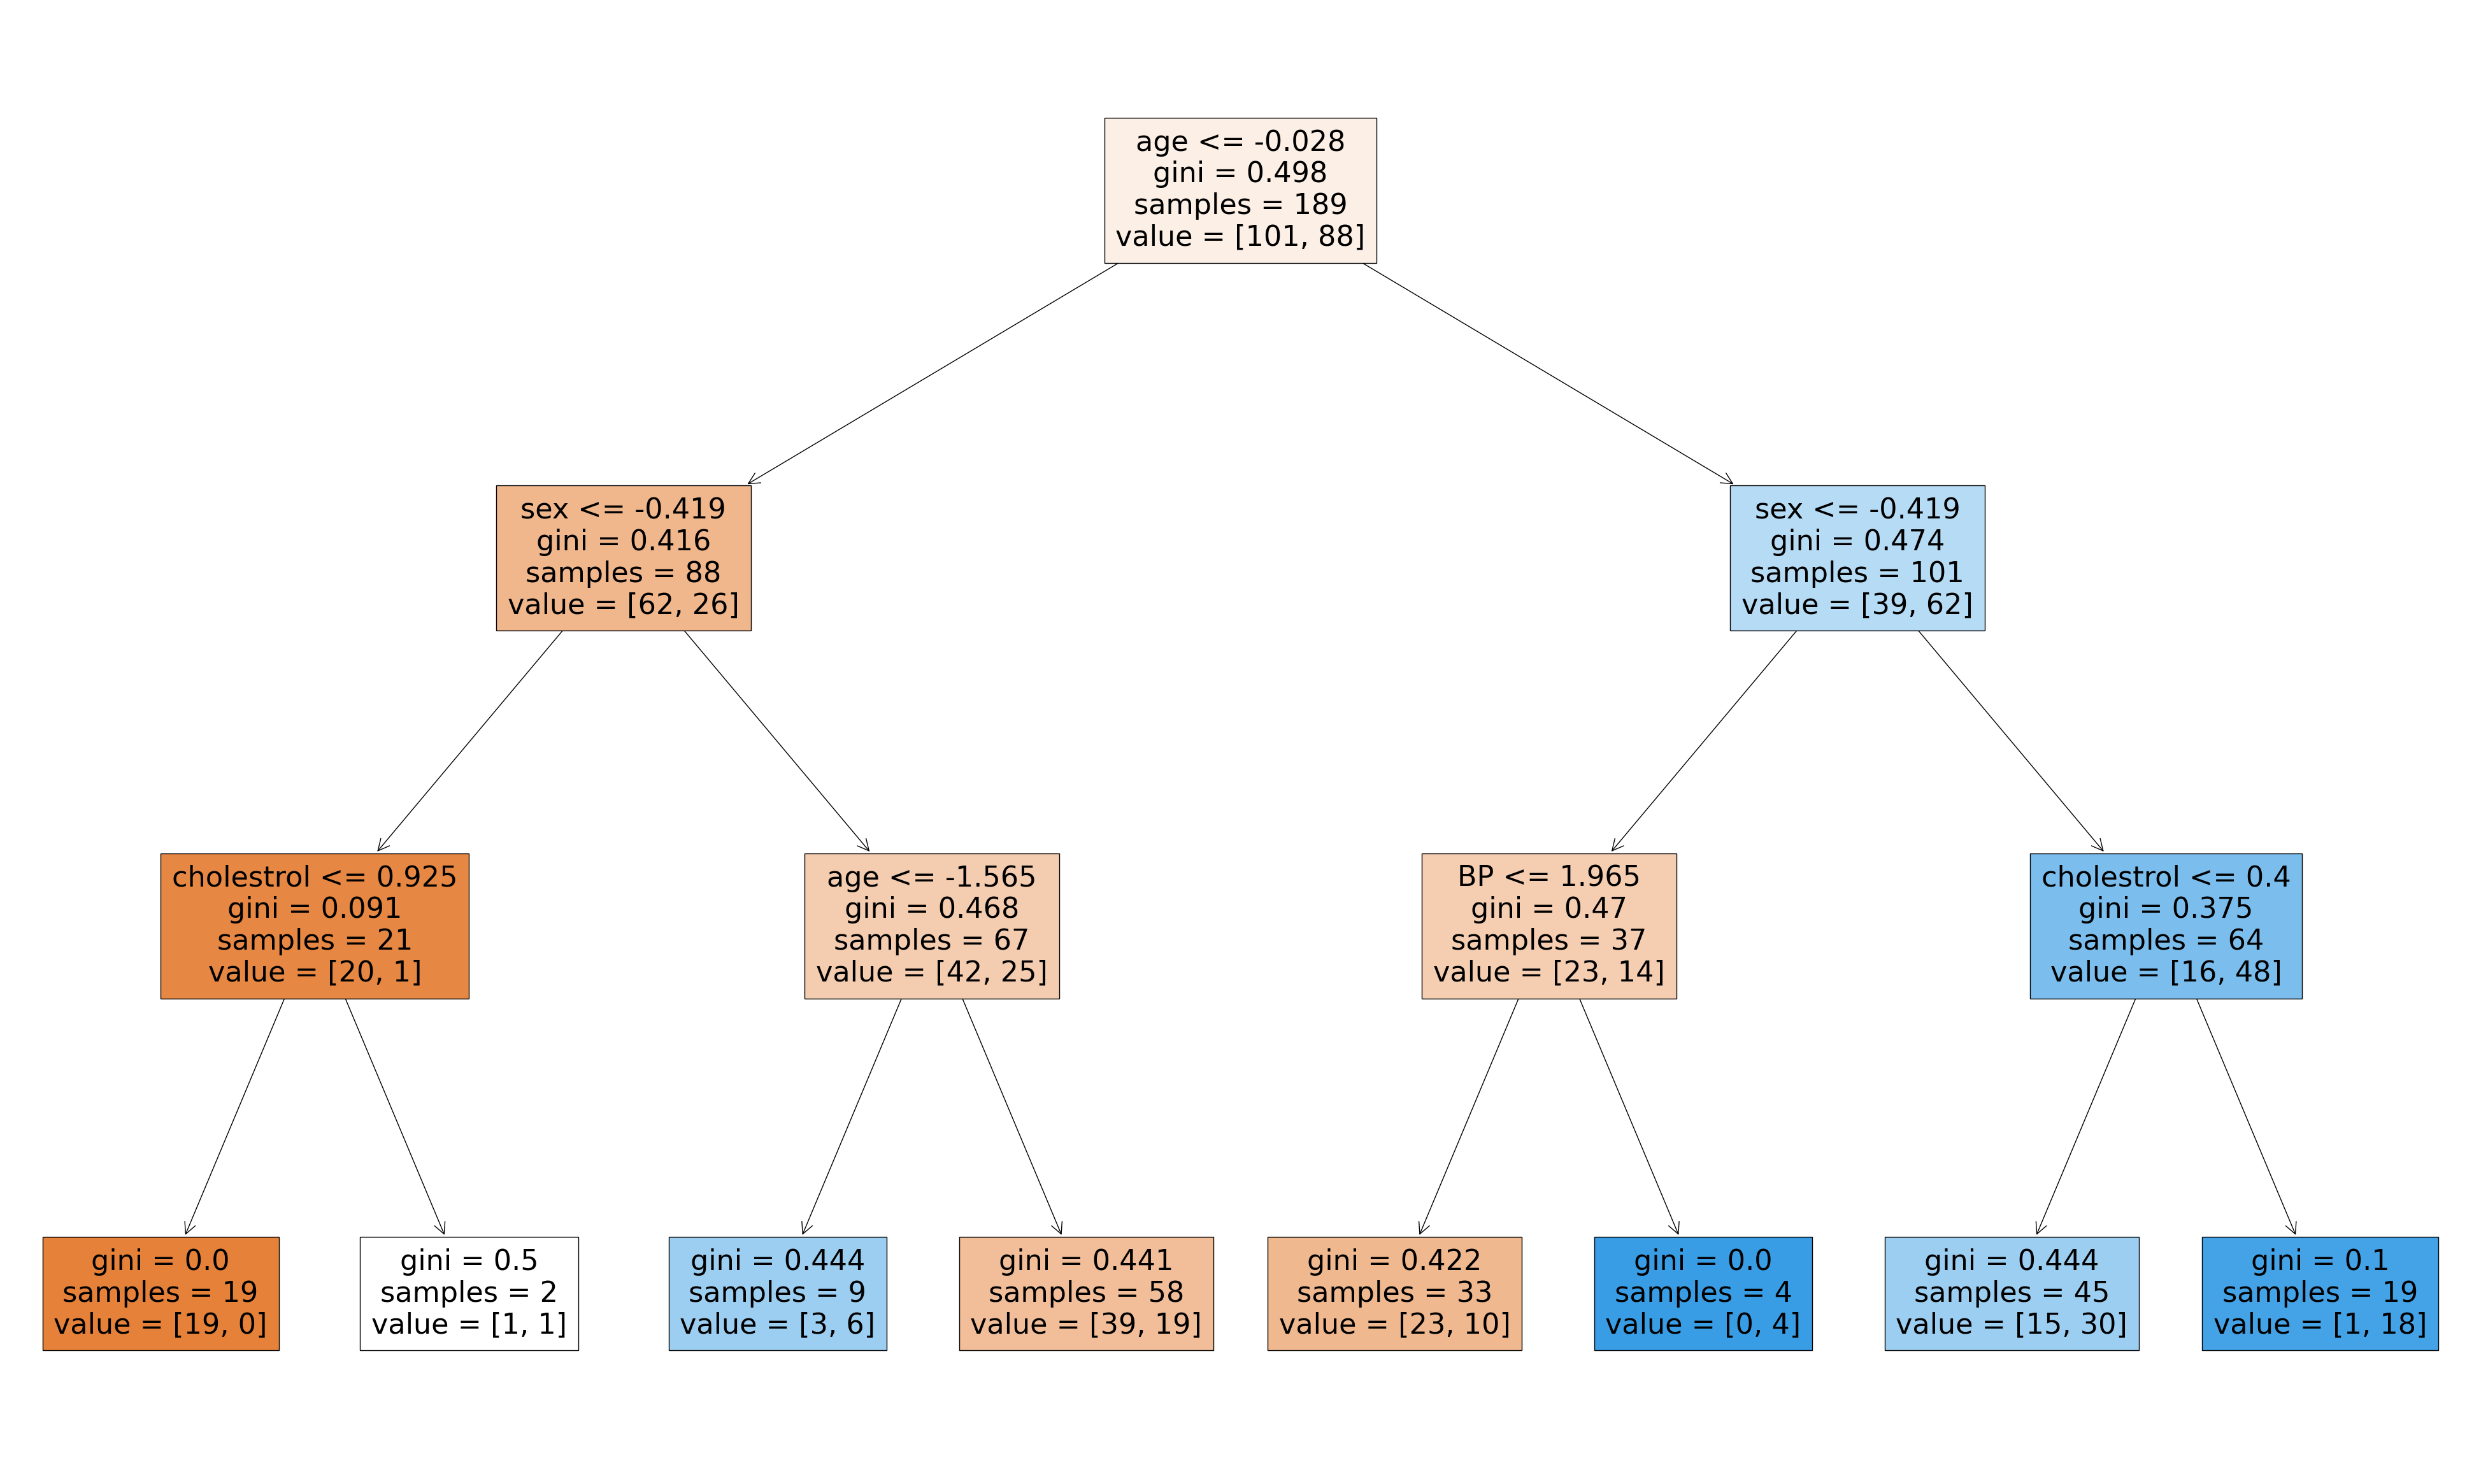

In [55]:
plt.figure(figsize=(50,30))
plot_tree(retail_dt, feature_names =X.columns,filled=True);

In [56]:
y_train_pred=retail_dt.predict(X_train)
y_test_pred=retail_dt.predict(X_train)

In [57]:
##Confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [59]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [60]:
print("Test Performance")
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

Test Performance


ValueError: Found input variables with inconsistent numbers of samples: [81, 189]

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
##Random forest
?RandomForestClassifier

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,n_jobs=-1, random_state=42)

In [71]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       n_jobs=-1, random_state=42)

In [72]:
rf.base_estimator_ 

DecisionTreeClassifier()

In [73]:
rf.n_features_

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning:

Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.



4

In [74]:
rf.feature_names_in_ 

array(['age', 'sex', 'BP', 'cholestrol'], dtype=object)

In [75]:
rf.n_outputs_ 

1

In [76]:
sample_tree = rf.estimators_[20]

In [77]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [78]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [79]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       n_jobs=-1, random_state=42)

In [81]:
y_pred = rf.predict(X_test)

In [82]:
accuracy = rf.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 67.90%


In [83]:
##Kmean clusters

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [85]:
retail_dt=pd.read_csv("heart_v2.csv")

retail_dt.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [86]:
##missing values
round(100*(retail_dt.isnull().sum())/len(retail_dt),2)

age              0.0
sex              0.0
BP               0.0
cholestrol       0.0
heart disease    0.0
dtype: float64

In [87]:
retail_dt=retail_dt.dropna()
retail_dt.shape

(270, 5)

In [88]:
retail_dt.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [89]:
retail_dt['new']=retail_dt['heart disease']*retail_dt['cholestrol']
retail_dt.head()

age  sex   BP  cholestrol  heart disease  new
0   70    1  130         322              1  322
1   67    0  115         564              0    0
2   57    1  124         261              1  261
3   64    1  128         263              0    0
4   74    0  120         269              0    0

In [90]:
group_dt=retail_dt.groupby('age')['new'].sum()
group_dt=group_dt.reset_index()
group_dt.head()

age  new
0   29    0
1   34    0
2   35  480
3   37    0
4   38  231

In [91]:
##frequency
frequency=retail_dt.groupby('age')['BP'].count()
frequency=frequency.reset_index()
frequency.columns=['age','frequency']
frequency.head()

age  frequency
0   29          1
1   34          2
2   35          3
3   37          2
4   38          1

In [92]:
group_dt=pd.merge(group_dt,frequency, on='age',how='inner')
group_dt.head()

age  new  frequency
0   29    0          1
1   34    0          2
2   35  480          3
3   37    0          2
4   38  231          1

In [93]:
retail_dt.head()

age  sex   BP  cholestrol  heart disease  new
0   70    1  130         322              1  322
1   67    0  115         564              0    0
2   57    1  124         261              1  261
3   64    1  128         263              0    0
4   74    0  120         269              0    0

In [94]:
#retail_dt['diff']=group_dt

In [95]:
#last_patient=retail_dt.groupby('age')['diff'].min()
#last_patient=last_patient.reset_index()
#last_patient.head()

In [96]:
group_dt.head()

age  new  frequency
0   29    0          1
1   34    0          2
2   35  480          3
3   37    0          2
4   38  231          1

In [97]:
from sklearn import preprocessing


In [98]:

rfm_dt=group_dt[['age','new','frequency']]
scaler=StandardScaler()

rfm_dt_scaled=scaler.fit_transform(rfm_dt)
rfm_dt_scaled.shape

(41, 3)

In [99]:
rfm_dt_scaled=pd.DataFrame(rfm_dt_scaled)
rfm_dt_scaled.columns=['age','new','frequency']
rfm_dt_scaled.head()

age       new  frequency
0 -2.007801 -1.170748  -1.409344
1 -1.606632 -1.170748  -1.157016
2 -1.526398 -0.422102  -0.904688
3 -1.365931 -1.170748  -1.157016
4 -1.285697 -0.810462  -1.409344

In [100]:
last_patient=retail_dt.groupby('heart disease').min()
last_patient=last_patient.reset_index()
last_patient.head()

heart disease  age  sex   BP  cholestrol  new
0              0   29    0   94         126    0
1              1   35    0  100         149  149

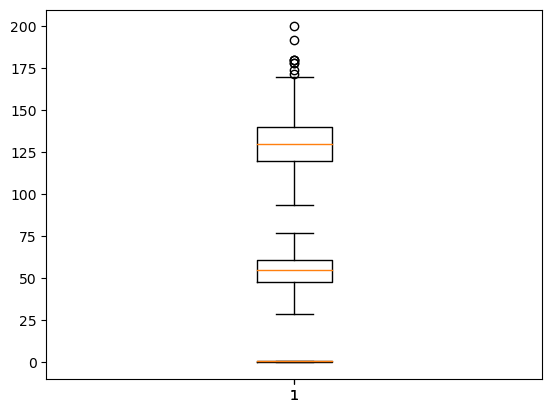

In [101]:
import matplotlib.pyplot as plt
plt.boxplot(retail_dt['age'])
plt.boxplot(retail_dt['sex'])
plt.boxplot(retail_dt['BP'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='BP'>

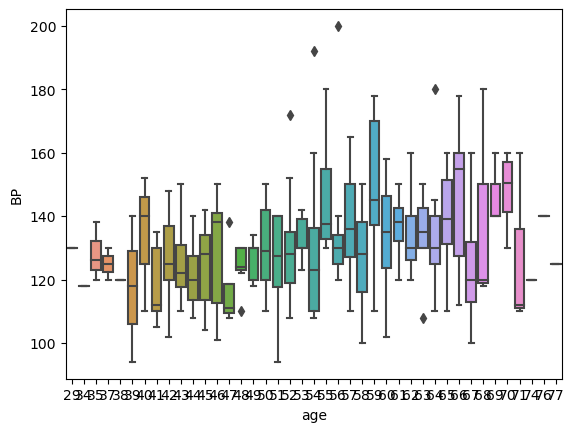

In [102]:
sns.boxplot(x='age', y='BP',data=retail_dt)

<AxesSubplot:xlabel='BP', ylabel='age'>

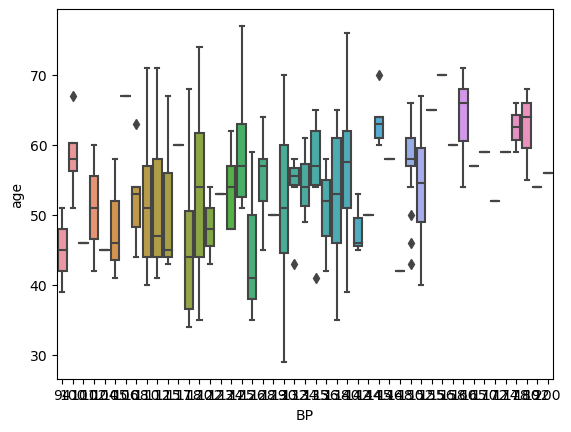

In [103]:
sns.boxplot(x='BP', y='age',data=retail_dt)

In [104]:
####Hopkins


In [140]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
import numpy as np

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist,_ss = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist,_ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    
    return H


In [141]:
rfm_dt_scaled=pd.DataFrame(rfm_dt_scaled)
rfm_dt_scaled.columns=['age','new','frequency']

retail_dt_scaled=pd.DataFrame(retail_dt_scaled)
retail_dt_scaled.columns=['age','BP','sex','cholesrole','new','frequency']
retail_dt.head()


In [142]:
hopkins(rfm_dt_scaled)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names

0.756703202266792

In [122]:
##kmeans  orbitory

In [ ]:
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_dt_scaled)

In [ ]:
kmeans.labels_

In [ ]:
#finding cluster
#elow curve
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_dt_scaled)
    ssd.append(kmeans.inertia_)
    plt.plot(ssd)

In [ ]:
##sa
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the KMeans clustering algorithm with n_clusters
    kmeans= KMeans(n_clusters=n_clusters, random_state=10)
    kmeans.fit_predict(X)
    cluster_labels=kmeans.labels_

    # Calculate the average silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("for n_clusters={0},the silhouette score is{1}".format(num_clusters))
    

In [278]:
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_dt_scaled)

KMeans(max_iter=50, n_clusters=3)

In [279]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [280]:
group_dt['age']=kmeans.labels_
group_dt.head()

BP  new  age
0   94    0    1
1  100  533    1
2  101    0    1
3  102    0    1
4  104    0    1

<AxesSubplot:xlabel='age', ylabel='new'>

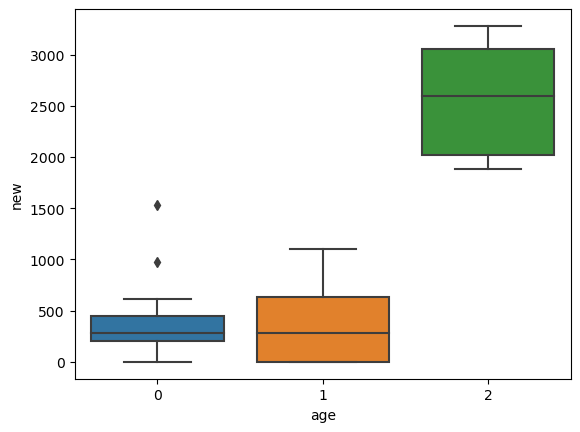

In [281]:
sns.boxplot(x='age',y='new',data=group_dt)

In [282]:
###Hierarchical clustering

In [283]:
rfm_dt_scaled.head()

0         1
0 -0.788227 -1.659050
1 -0.146627 -1.425474
2 -0.788227 -1.386545
3 -0.788227 -1.347615
4 -0.788227 -1.269757

In [284]:
group_dt.head()

BP  new  age
0   94    0    1
1  100  533    1
2  101    0    1
3  102    0    1
4  104    0    1

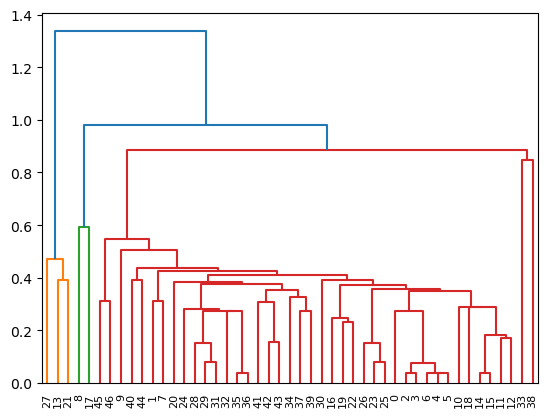

In [285]:
#single linkage
mergings=linkage(rfm_dt_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

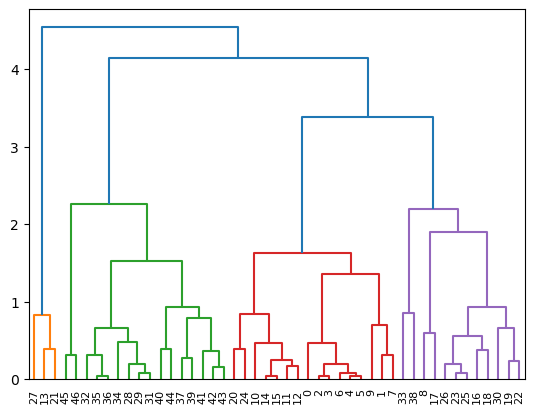

In [286]:
##complete linkage
mergings=linkage(rfm_dt_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [287]:
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2])

In [288]:
group_dt['cluster_labels']=cluster_labels
group_dt.head()

BP  new  age  cluster_labels
0   94    0    1               0
1  100  533    1               0
2  101    0    1               0
3  102    0    1               0
4  104    0    1               0

<AxesSubplot:xlabel='cluster_labels', ylabel='new'>

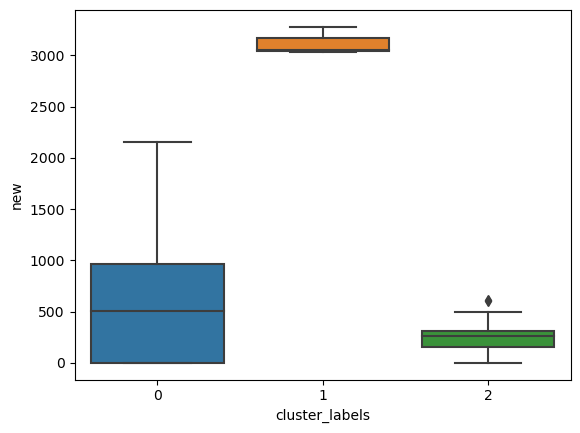

In [289]:
sns.boxplot(x='cluster_labels',y='new',data=group_dt)

<AxesSubplot:xlabel='cluster_labels', ylabel='age'>

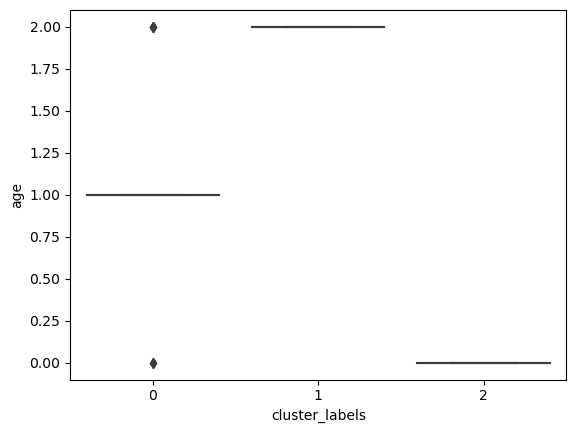

In [290]:
sns.boxplot(x='cluster_labels',y='age',data=group_dt)